
## `Лабораторная работа №1`

#### Фамилия, имя: Игнаткин Максим

Дата выдачи: <span style="color:red">__02 декабря__</span>.

Срок сдачи: <span style="color:red">__25 декабря__</span>.

Максимальная оценка: __10 баллов__





## `Тема 01. Полносвязная нейронная сеть`




## `Теоретические сведения`

### **Градиент слоя**

##

Рассмотрим нейронную сеть, в которой есть Batch normalization слой (BN).

[PyTorch‑документация, где собраны все нормализации](https://docs.pytorch.org/docs/stable/nn.aliases.html#normalization-layers)

Пусть на вход cлоя BN был подан батч из $n$ объектов:

$$
X = X_1, X_2, ..., X_n
$$


Предположим, у всех объектов по одному признаку $X \in \mathbb{R}^{n \times 1}$.
Рассмотрим вычисление градиента функции потерь по параметрам и по входу слоя BN при обучении.

Напомним, обучение нейросети состоит из **трёх основных шагов**, которые повторяются для каждого батча данных: прямой проход, обратный проход и обновление весов.

---

##**Прямой проход (Forward Pass)**

**Цель:** вычислить предсказание сети и функцию потерь.

---

В слое BN при прямом проходе производятся следующие вычисления.

1. Среднее:
$$
\mu = \frac{1}{n} \sum_{i=1}^n X_i
$$

2. Дисперсия:
$$
\sigma^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2
$$

3. Нормализация:
$$
\tilde{y}_i = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}}
$$

4. Масштабирование:
$$
y_i = \gamma \tilde{y}_i + \delta
$$



Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети.


---

##**Обратный проход (Backpropagation)**

**Цель:** вычислить, как каждый параметр влияет на ошибку (градиенты).

---


$\mathcal{L}$ - функция потерь.

Пусть на выход BN слоя пришёл градиент функции потерь:
$$
\nabla_{y_j} L = g_i = \frac{\partial L}{\partial y_i}
$$


## 1. Градиент по $\tilde{y}_i\$

Так как  
$$
y_i = \gamma \tilde{y}_i + \delta,$$
то

$$
\frac{\partial L}{\partial \tilde{y}_i} = g_i \cdot \gamma
$$

Обозначим:
$$
\hat{g}_i = \frac{\partial L}{\partial \tilde{y}_i} = g_i \gamma
$$

---

## 2. Градиент по $X_i$ через развернутую формулу

Имеем:

$$
\tilde{y}_i = \frac{X_i - \mu}{\sigma},
\qquad
\sigma = \sqrt{\sigma^2 + \varepsilon}
$$

Частная производная второго порядка, так как $\mu$ и $\sigma$ зависят от всех $X_j$.

---

## 2.1. Частная производная по $X_i$, игнорируя зависимость $\mu$ и $\sigma$
$$
\frac{\partial \tilde{y}_i}{\partial X_i} = \frac{1}{\sigma}
$$

---

## 2.2. Вклад от производной $\mu$

$$
\mu = \frac{1}{n} \sum_j X_j
$$

$$
\frac{\partial \tilde{y}_i}{\partial \mu}
= -\frac{1}{\sigma}
$$

$$
\frac{\partial \mu}{\partial X_i} = \frac{1}{n}
$$

---

## 2.3. Вклад от производной $\sigma$

$$
\sigma = \sqrt{\sigma^2 + \varepsilon},
\quad
\sigma^2 = \frac{1}{n} \sum_j (X_j - \mu)^2
$$

$$
\frac{\partial \tilde{y}_i}{\partial \sigma}
= -\frac{X_i - \mu}{\sigma^2}
= -\frac{\tilde{y}_i}{\sigma}
$$
Теперь:

$$
\frac{\partial \sigma}{\partial X_i}
= \frac{1}{2\sigma} \cdot \frac{\partial \sigma^2}{\partial X_i}
$$

А

$$
\frac{\partial \sigma^2}{\partial X_i}
=
\frac{2}{n}(X_i - \mu)
$$
Следовательно:

$$
\frac{\partial \sigma}{\partial X_i}
= \frac{1}{n\sigma}(X_i - \mu)
= \frac{\tilde{y}_i}{n}
$$

Подставляем в цепочку:

$$
\frac{\partial \tilde{y}_i}{\partial X_i}\Big|_{\sigma}
=
-\frac{\tilde{y}_i}{\sigma} \cdot \frac{\tilde{y}_i}{n}
=
-\frac{\tilde{y}_i^2}{n\sigma}
$$

---

## 2.4. Итоговая производная $\frac{\partial \tilde{y}_i}{\partial X_i}\ $

Суммируем все компоненты:

$$
\frac{\partial \tilde{y}_i}{\partial X_i}
=
\frac{1}{\sigma}
-
\frac{1}{n\sigma}
-
\frac{\tilde{y}_i^2}{n\sigma}
$$

---

## 2.5. Вклад от всех $X_j, j \neq i$

Для $j \neq i$:

### Через зависимость $\mu$:

$$
\frac{\partial \mu}{\partial X_j} = \frac{1}{n}
$$

$$
\frac{\partial \tilde{y}_i}{\partial X_j}\Big|_\mu
=
-\frac{1}{\sigma} \cdot \frac{1}{n}
$$

### Через зависимость $\sigma$:

$$
\frac{\partial \sigma^2}{\partial X_j} = \frac{2}{n}(X_j - \mu)
$$

$$
\frac{\partial \sigma}{\partial X_j} = \frac{\tilde{y}_j}{n}
$$

$$
\frac{\partial \tilde{y}_i}{\partial X_j}\Big|_\sigma
=
-\frac{\tilde{y}_i}{\sigma} \cdot \frac{\tilde{y}_j}{n}
$$

Итого:

$$
\frac{\partial \tilde{y}_i}{\partial X_j}
=
-\frac{1}{n\sigma}
-
\frac{\tilde{y}_i \tilde{y}_j}{n\sigma}
$$

---

## 3. Градиент по входу $X_i$


$$
\frac{\partial L}{\partial X_i}
=
\sum_{j=1}^n
\hat{g}_j \cdot \frac{\partial \tilde{y}_j}{\partial X_i}
$$

Подставляем выражения (для j=i и j≠i), группируем и упрощаем — получаем итоговую формулу:
$$
\frac{\partial L}{\partial X_i}
=
\frac{\gamma}{n \cdot \sigma}
\left[
n g_i
- \sum_{j=1}^n g_j
- \tilde{y}_i \sum_{j=1}^n g_j \tilde{y}_j
\right]
$$

---

## Итог

Финальный градиент по входу BatchNorm:

$$
\boxed{
\frac{\partial L}{\partial X_i}
=
\frac{\gamma}{n \cdot \sigma}
\left[
n g_i
- \sum_{j=1}^n g_j
- \tilde{y}_i \sum_{j=1}^n g_j \tilde{y}_j
\right]
}
$$

Эта формула совпадает с тем, что реализовано в PyTorch и TensorFlow.


---

##**Обновление параметров (Gradient Descent)**

**Цель:** изменить параметры нейросети так, чтобы уменьшить ошибку в будущем.

---




### **Инициализация весов**

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

**Математическая модель слоя**:


- $l$ — индекс слоя ($l = 1,\ldots,L$)
- $n_l$ — размерность входа $l$-го слоя
- $\mathbf{x}^l \in \mathbb{R}^{n_l}$ — входной вектор слоя $l$
- $\mathbf{y}^l \in \mathbb{R}^{n_{l+1}}$ — выход линейного преобразования слоя $l$
- $\mathbf{W}^l \in \mathbb{R}^{n_{l+1} \times n_l}$ — матрица весов слоя $l$
- $\mathbf{b}^l \in \mathbb{R}^{n_{l+1}}$ — вектор смещений слоя $l$

Прямое распространение через слой $l$, в случае активации $tahn()$ описывается уравнениями:
$$
\mathbf{y}^l = \mathbf{W}^l \mathbf{x}^l + \mathbf{b}^l
$$
$$
\mathbf{x}^{l+1} = g(\mathbf{y}^l) = \text{tahn}(\mathbf{y}^l)
$$


### Вывод инициализации для гиперболического тангенса


#### 1. Дисперсия выхода слоя

Рассмотрим дисперсию $k$-го элемента выхода $\mathbf{y}^l$:
$$
\mathbb{D}[y^l_k] = \mathbb{D}\left[\sum_{j=1}^{n_l} W^l_{kj} x^l_j + b^l_k\right]
$$

При нулевой инициализации смещений ($b^l_k = 0$) и независимости элементов:
$$
\mathbb{D}[y^l_k] = \sum_{j=1}^{n_l}\mathbb{D}[W^l_{kj} x^l_j]
$$

Используя независимость $W^l$ и $\mathbf{x}^l$, а также $\mathbb{E}[W^l_{kj}] = 0$:
$$
\mathbb{D}[y^l_k] = \sum_{j=1}^{n_l} \mathbb{D}[W^l_{kj}] \cdot \mathbb{D}[x^l_j] + \mathbb{D}[W^l_{kj}] \cdot (\mathbb{E}[x^l_j])^2
$$

#### 2. Свойства гиперболического тангенса

Для $g(y) = \tanh(y)$ имеем:
- Функция нечётная: $\tanh(-y) = -\tanh(y)$
- Если $y$ имеет нулевое среднее и симметричное распределение, то $\mathbb{E}[\tanh(y)] = 0$

При малых значениях $y$: $\tanh(y) \approx y$
При больших значениях $y$: $|\tanh(y)| \leq 1$

#### 3. Линеаризация в окрестности нуля

В начале обучения, при правильной инициализации, активации находятся в линейном режиме:
$$
x^{l+1}_j = \tanh(y^l_j) \approx y^l_j \quad \text{при малых } y^l_j
$$

Следовательно:
$$
\mathbb{D}[x^{l+1}_j] \approx \mathbb{D}[y^l_j]
$$

#### 4. Условие сохранения дисперсии

Для стабильности обучения хотим сохранить дисперсию по слоям:
$$
\mathbb{D}[y^l_k] = \mathbb{D}[y^{l-1}_k]
$$

Подставляя приближение:
$$
\mathbb{D}[y^l_k] = n_l \cdot \mathbb{D}[W^l] \cdot \mathbb{D}[x^l] \approx n_l \cdot \mathbb{D}[W^l] \cdot \mathbb{D}[y^{l-1}]
$$

Для сохранения дисперсии:
$$
n_l \cdot \mathbb{D}[W^l] = 1
$$
#### 5. Инициализация Xavier

Получаем формулу инициализации:
$$
\mathbb{D}[W^l] = \frac{1}{n_l}
$$

Для равномерного распределения:
$$
W^l \sim U\left(-\sqrt{\frac{3}{n_l}}, \sqrt{\frac{3}{n_l}}\right)
$$

Для нормального распределения:
$$
W^l \sim N\left(0, \frac{1}{n_l}\right)
$$

#### 6. Уточнение (инициализация Glorot)

На практике часто используют симметричный вариант, учитывающий размерности обоих слоев:
$$
\mathbb{D}[W^l] = \frac{2}{n_l + n_{l+1}}
$$

Для равномерного распределения:
$$
W^l \sim U\left(-\sqrt{\frac{6}{n_l + n_{l+1}}}, \sqrt{\frac{6}{n_l + n_{l+1}}}\right)
$$

Для нормального распределения:
$$
W^l \sim N\left(0, \frac{2}{n_l + n_{l+1}}\right)
$$

Это известная **инициализация Xavier** (Glorot et al., 2010), оптимальная для сигмоидных и гиперболических тангенс-функций.

### `Задание 1. Градиенты для слоя Layer normalization (3 балла)`

Рассмотрим слой **Layer Normalization**. В отличие от BatchNorm, где нормализация происходит по батчу объектов, LayerNorm выполняет нормализацию **по признакам одного объекта**.

Пусть на вход LayerNorm слоя поступил **один объект** с $ m$ признаками. Тогда вход можно представить как вектор:

$$
X \in \mathbb{R}^{1 \times m}
$$


Вычислите выражения для:

1. $\frac{\partial L}{\partial \gamma_j} \ $

2. $\frac{\partial L}{\partial \delta_j} \ $

3. $\frac{\partial L}{\partial X_j} $ — полный градиент по входу


Подсказка: воспользоваться правилом цепочки и тем фактом, что $ \mu $ и $ \sigma^2 $ тоже зависят от $X_j $.



**Ваш ответ**
### 1. Вычисление $\frac{\partial L}{\partial \gamma_j}$
$$ y_j = \gamma_j \hat{X}_j + \delta_j $$

Применим правило дифференцирования:
$$
\frac{\partial L}{\partial \gamma_j} = \frac{\partial L}{\partial y_j} \cdot \frac{\partial y_j}{\partial \gamma_j}
$$

$$
\boxed{\frac{\partial L}{\partial \gamma_j} = g_j \cdot \hat{X}_j}
$$
### 2. Вычисление $\frac{\partial L}{\partial \delta_j}$

Параметр $\delta_j$ является смещением.

$$ y_j = \gamma_j \hat{X}_j + \delta_j $$

$$
\frac{\partial L}{\partial \delta_j} = \frac{\partial L}{\partial y_j} \cdot \frac{\partial y_j}{\partial \delta_j}
$$

Так как производная $y_j$ по $\delta_j$ равна 1 то:

$$
\boxed{\frac{\partial L}{\partial \delta_j} = g_j}
$$
### 3. Вычисление полного градиента по входу $\frac{\partial L}{\partial X_j}$

Обозначим промежуточный градиент по нормализованному входу как
$$ \hat{g}_j = \frac{\partial L}{\partial \hat{X}_j} = \frac{\partial L}{\partial y_j} \cdot \gamma_j = g_j \gamma_j $$

Формула градиента для $X_j$ состоит из трех компонент (прямой вклад, вклад через $\mu$ и вклад через $\sigma$):

$$
\frac{\partial L}{\partial X_j} = \sum_{k=1}^m \hat{g}_k \frac{\partial \hat{X}_k}{\partial X_j}
$$

Используя формулу, аналогичную финальной формуле BN, но заменяя $n$ на $m$ (количество признаков) и $\tilde{y}$ на $\hat{X}$, получаем:

$$
\frac{\partial L}{\partial X_j} = \frac{1}{m \sigma} \left( m \cdot \hat{g}_j - \sum_{k=1}^m \hat{g}_k - \hat{X}_j \sum_{k=1}^m (\hat{g}_k \cdot \hat{X}_k) \right)
$$

Где:
*   $m$ — количество признаков.
*   $\sigma$ — стандартное отклонение признаков для данного объекта.
*   $\hat{g}_j = g_j \gamma_j$.
*   $\hat{X}_j$ — нормализованное значение признака.

**Итоговый ответ:**

$$
\boxed{
\frac{\partial L}{\partial X_j} = \frac{1}{m \cdot \sigma} \left[ m g_j \gamma_j - \sum_{k=1}^m g_k \gamma_k - \hat{X}_j \sum_{k=1}^m g_k \gamma_k \hat{X}_k \right]
}
$$


### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (2 балла)`.

**Ваш ответ**
Рассмотрим слой $l$.
Пусть $\mathbf{y}^l = \mathbf{W}^l \mathbf{x}^l + \mathbf{b}^l$ — выход линейного слоя (до активации), а $\mathbf{x}^{l+1} = \text{ReLU}(\mathbf{y}^l)$ выход после активации.
Пусть
1.  Веса $W^l$ инициализируются с $\mathbb{E}[W^l] = 0$.
2.  Смещения $b^l = 0$
3.  Входные данные и веса независимы друг от друга.
4.  Распределение $\mathbf{y}^{l-1}$ симметрично относительно нуля (до применения ReLU).

#### 1. Дисперсия выхода линейного слоя

Рассмотрим дисперсию одного нейрона на выходе $y^l_k$:
$$
y^l_k = \sum_{j=1}^{n_l} W^l_{kj} x^l_j
$$
Так как $\mathbb{E}[W^l] = 0$, то $\mathbb{E}[y^l] = 0$. Дисперсия суммы независимых случайных величин равна сумме дисперсий:
$$
\mathbb{D}[y^l_k] = n_l \cdot \mathbb{D}[W^l_{kj} x^l_j]
$$
Используя свойство дисперсии произведения независимых величин ($\text{Var}(XY) = E[X^2]E[Y^2] - (E[X]E[Y])^2$):
$$
\mathbb{D}[y^l_k] = n_l \cdot \mathbb{E}[(W^l)^2] \cdot \mathbb{E}[(x^l)^2]
$$
Так как $\mathbb{E}[W] = 0$, то $\mathbb{D}[W] = \mathbb{E}[W^2]$.
Получаем:
$$
\mathbb{D}[y^l] = n_l \cdot \mathbb{D}[W^l] \cdot \mathbb{E}[(x^l)^2]
$$

#### 2. Влияние ReLU на дисперсию

Здесь главное отличие от Tanh.
Вход текущего слоя $x^l$ — это выход предыдущего слоя после активации:
$$
x^l = \text{ReLU}(y^{l-1}) = \max(0, y^{l-1})
$$
Нам нужно найти $\mathbb{E}[(x^l)^2]$.
$$
\mathbb{E}[(x^l)^2] = \mathbb{E}[(\text{ReLU}(y^{l-1}))^2]
$$
По предположению, $y^{l-1}$ распределен симметрично вокруг нуля. ReLU зануляет все отрицательные значения, а положительные оставляет как есть (возведение в квадрат сохраняет знак +).
Это означает, что ровно половина значений становится нулем, а вторая половина вносит вклад, равный $\mathbb{E}[(y^{l-1})^2]$.

Следовательно:
$$
\mathbb{E}[(x^l)^2] = \frac{1}{2} \mathbb{E}[(y^{l-1})^2] = \frac{1}{2} \mathbb{D}[y^{l-1}]
$$
(Множитель $\frac{1}{2}$ появляется именно из-за свойства ReLU обрезать половину сигнала).

#### 3. Условие сохранения потока сигнала

Подставим результат шага 2 в формулу шага 1:

$$
\mathbb{D}[y^l] = n_l \cdot \mathbb{D}[W^l] \cdot \left( \frac{1}{2} \mathbb{D}[y^{l-1}] \right)
$$

Мы хотим, чтобы дисперсия сигнала не затухала и не взрывалась при прохождении через слои, то есть:
$$
\mathbb{D}[y^l] = \mathbb{D}[y^{l-1}]
$$

Приравниваем коэффициенты:
$$
1 = n_l \cdot \mathbb{D}[W^l] \cdot \frac{1}{2}
$$

#### 4. Итоговая формула 

Выражаем необходимую дисперсию весов:

$$
\mathbb{D}[W^l] = \frac{2}{n_l}
$$


**В виде распределений:**

1.  **Нормальное распределение:**
    $$ W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{in}}}\right) $$

2.  **Равномерное распределение:**
    Если $W \sim U[-a, a]$, то $\mathbb{D}[W] = \frac{a^2}{3}$.
    $$ \frac{a^2}{3} = \frac{2}{n_{in}} \implies a = \sqrt{\frac{6}{n_{in}}} $$
    $$ W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}}\right) $$

**Ответ:** Для ReLU дисперсия весов должна быть равна $\frac{2}{n_{in}}$.


## `Тема 02. Свёрточная нейронная сеть`

## `Теоретические сведения`

### **Загрузка данных**

PyTorch использует **`Dataset`** в качестве базового интерфейса для доступа к данным.

Этот абстрактный класс определен в `torch.utils.data.dataset`:

```python
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
```
Создание нового датасета в PyTorch состоит из двух шагов: наследование от базового класса Dataset и реализация двух ключевых методов — `__getitem__ `(возвращает элемент по индексу) и `__len__ `(возвращает размер датасета).

В библиотеке torchvision уже есть удобная реализация — `ImageFolder`. Она позволяет быстро создать датасет из папки, организованной в ImageNet-стиле: каждый класс в отдельной поддиректории (`./train/собаки/`, `./train/кошки/` и т.д.)."  Пример:


```python
imagenet = torchvision.datasets.ImageFolder('path/to/imagenet_root/')
```

### **Преобразование данных**

Когда вы создаёте датасет с помощью `ImageFolder`, вы можете указать два параметра:

`transform` — преобразования для изображений (из PIL в тензоры, нормализация и т.д.)

`target_transform` (опционально) — преобразования для меток.

Для большинства стандартных задач достаточно использовать готовые трансформации из `torchvision.transforms`. Этот модуль включает как базовые операции (`ToTensor`, `Normalize`), так и случайные (`RandomHorizontalFlip`) — последние позволяют легко реализовать аугментацию прямо в пайплайне загрузки данных.

Если же вам нужна уникальная трансформация, создайте собственный класс: определите конструктор и реализуйте метод `__call__(self, sample)`.

```python
class HorizontalFlip(object):
    def __init__(self, mode=0):
        self.method = mode

    def __call__(self, img):
        """
        Args:
            img (PIL.Image): Image to be flipped.

        Returns:
            PIL.Image: Randomly flipped image.
        """
        if self.method:
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        return img

```

С полным списком стандартных преобразований можно ознакомиться в [документации](https://pytorch.org/vision/0.12/transforms.html).


### **Загрузчик данных**

В процессе обучения мы редко работаем с датасетами напрямую. Вместо этого используется `DataLoader` — специальный объект, который оборачивает датасет и позволяет удобно получать из него батчи.

Основные параметры `DataLoader`:

- `num_workers` — определяет количество фоновых процессов для подготовки данных. При значении >1 несколько процессов параллельно загружают и обрабатывают изображения, что значительно ускоряет подачу данных на GPU.

- `shuffle` — перемешивает данные перед каждой эпохой, предотвращая запоминание порядка примеров.

Так как GPU обрабатывает батчи очень быстро, а загрузка данных часто становится узким местом, рекомендуется использовать num_workers от 3 до 10. Это позволяет поддерживать высокую нагрузку на GPU.

В некоторых конфигурациях Jupyter Notebook DataLoader с `num_workers > 0` может вызывать ошибки. В таком случае необходимо установить `num_workers=0`

### **Свёрточный слой**



В сверточных сетях каждый выходной канал функционирует как независимый признак — аналогично нейронам в полносвязном слое. Свертку можно рассматривать как линейные слои для окрестности пикселя. С каждым слоем мы всё больше уточняем **карту признаков (feature map)**.

При проектировании архитектур используется схожий принцип: количество каналов последовательно увеличивается от слоя к слою (например, 64 → 128 → 256), что позволяет сети извлекать все более сложные и разнообразные паттерны.

- Ранние слои: выделяют низкоуровневые признаки (края, текстуры).

- Средние слои: комбинируют их в более сложные паттерны (формы, части объектов).

- Глубокие слои: создают высокоуровневые, семантические представления (целые объекты, сцены).



**Свёртка 2d изображения**

---
Рассмотрим полную свёртку:

$
\begin{align*}
&V(x,y,t) = \sum\limits_{i=x-\delta}^{x+\delta} \sum\limits_{j=y-\delta}^{y+\delta}\sum\limits_{s=1}^{S} K(i-x+\delta,j-y+\delta,s,t)U(i,j,s),\\
&U \in \mathbb{R}^{W \times H \times S}, \quad V \in \mathbb{R}^{W' \times H' \times T}, \quad K \in \mathbb{R}^{k \times k \times S \times T}, \quad k = 2 \delta + 1.
\end{align*}
$

---

$U \in \mathbb{R}^{W \times H \times S}$ — **входной тензор (изображение)**.

$W$ — ширина (width),

$H$ — высота (height),

$S$ — количество каналов (channels), например 3 для RGB.

$V \in \mathbb{R}^{W' \times H' \times T}$ — **выходной тензор (feature map)**.

$W'$ — новая ширина,

$H'$ — новая высота,

$T$ — количество выходных каналов.

$K \in \mathbb{R}^{k \times k \times S \times T}$ — **ядро свертки (фильтр)**,

$k$ — размер ядра (kernel size),

$S$ — входные каналы (должно совпадать с $S$ из $U$),

$T$ — выходные каналы (должно совпадать с $T$ из $V$).


$(x, y)$ — координаты в выходном тензоре $V$,

$(i, j)$ — координаты во входном тензоре $U$,

$s$ — индекс входного канала,

$t$ — индекс выходного канала.

**Пояснения к формуле**:

- $\sum\limits_{i=x-\delta}^{x+\delta} \sum\limits_{j=y-\delta}^{y+\delta}$  - суммирование по пространству: берёт окно размера $k \times k$ вокруг точки $(x, y)$ во входном тензоре $U$.


- $\sum\limits_{s=1}^{S}$ - суммирование по входным каналам.


- Умножение на элементы ядра:

$$K(i-x+\delta, j-y+\delta, s, t) \cdot U(i, j, s)$$


$i-x+\delta$ — строка в ядре свертки,

$j-y+\delta$ — столбец в ядре свертки,

$s$ — входной канал ядра,

$t$ — выходной канал ядра.

$(i, j)$ — координаты во входе $U$,

$(x, y)$ — координаты в выходе $V$,

Разность $(i-x, j-y)$ показывает смещение относительно центра.

Добавление $\delta$ переводит в диапазон $[0, 2\delta] = [0, k-1]$.

##
Перед настройкой сверточного слоя необходимо ответить на вопросы: Что мы хотим от сверток? Какие признаки извлекать?

Параметры размерности свертки:

**`kernel_size`** — размер сверточного ядра.
Определяет, сколько соседних пикселей будет агрегироваться при каждой операции.

Пример: `kernel_size=3` -  ядро 3×3, которое обрабатывает 9 пикселей за раз.

**`in_channels`** — количество входных каналов.
Соответствует числу каналов входного изображения $U$.


**`out_channels`** — количество выходных каналов.
Определяет число различных фильтров (признаков), которые будет искать слой.

Параметры страйд и паддинга:
**`stride`** — шаг свертки.

**`padding`**— дополнение краев.

**Рецептивное поле (receptive field)** - размер части изображения, которая влияет на значение нейрона спустя несколько слоев - зона "покрытия" изображения нейроном.

Чем больше сверточных слоев, тем больше **receptive field**.

Чем больше **receptive field** у нейрона, тем больше **глобальных признаков** он знает.

**Реализация свёртки в PyTorch:**

$V(x,y,t) = Σ_i Σ_j Σ_s K(i,j,s,t)·U(x+i-δ, y+j-δ, s) + b(t)$

```python
import torch.nn as nn

S = in_channels  # входные каналы
T = out_channels # выходные каналы
k = kernel_size  # размер ядра (k = 2δ + 1)
δ = (k - 1) // 2 # радиус ядра

# Создание сверточного слоя
conv = nn.Conv2d(
    in_channels=S,      # S
    out_channels=T,     # T  
    kernel_size=k,      # k
    stride=1,           # шаг 1
    padding=δ,          # чтобы сохранить размеры
    bias=False          # или True
    )


```

### **Слои пулинга (Pooling)**

Выполняют две ключевые функции:

1. Увеличивают рецептивное поле — объединяют информацию из соседних областей, что позволяет сети учитывать более широкий контекст.

2. Сокращают пространственные размеры — уменьшают разрешение карт признаков, снижая вычислительные затраты на последующих слоях

При этом, обладают рядом преимуществ:

- Нет обучаемых параметров — только фиксированные операции (максимум, среднее).

- Не вызывают затухания градиентов — в отличие от некоторых активационных функций, что позволяет строить очень глубокие сети.

- Добавляют инвариантность к малым сдвигам и искажениям изображения.

**Выводы:**

1. Операция свертки инвариантна относительно сдвигов — их реакция на смещённые входные данные смещается соответствующим образом.

2. В сверточных слоях аналогом размерности скрытого состояния полносвязных сетей выступает количество каналов в карте признаков.

3. Размер рецептивного поля определяет масштаб извлекаемых признаков.

Для увеличения рецептивного поля можно использовать:

- Pooling-слои — уменьшают пространственные размеры, увеличивая охват.

- Свертки с большим stride — сокращают разрешение с сохранением обучаемых параметров.

- Каскады сверточных слоев — последовательное увеличение охвата.


### `Задание 3. Классификации изображений животных с помощью свёрточной нейронной сети для (5 баллов)`.

**Цель**: Разработать и обучить нейронную сеть для классификации изображений.

Основная задача: реализовать весь пайплан обучения модели и добиться хорошего значения метрики accuracy (> 0.5) на тестовой выборке.

Используется открытый датасет:

Animal Image Dataset (90 Different Animals) — https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals


**1.** Подготовка данных

Скачайте и распакуйте датасет.

Разделите выборку на обучающую и тестовую части (например, 80 % / 20 %).

Определите преобразования (`transform`) для изображений:

- изменение размера (например, 128×128);

- нормализация;

- при желании — аугментации (отражение, поворот, кроп).

Создайте объекты `torch.utils.data.Dataset` и `DataLoader`.

**2.** Реализуйте свёрточную нейронную сеть с использованием `torch.nn`:

- несколько свёрточных слоёв (Conv2d, ReLU, MaxPool2d);

- полносвязные слои для классификации;

- выходной слой с количеством нейронов, равным числу классов.

**3.** Определите функцию потерь (`CrossEntropyLoss`) и оптимизатор (`Adam` или `SGD`).

Обучите модель в течение 10–20 эпох, выводя на каждой эпохе:

`train_loss`, `train_accuracy`;

`val_loss`, `val_accuracy`.

**4.** Постройте графики изменения потерь (`loss`) и точности (`accuracy`) на обучающей и тестовой выборках.


Выведите несколько примеров изображений из тестового набора с предсказанными классами и истинными метками.



### **Рекомендации по улучшению нейросети**

1. Модификация архитектуры:

    1.1 Экспериментируйте с глубиной: больше/меньше Conv и FC слоев.

    1.2 Настройте ширину:

    - Conv слои: `out_channels` (64, 128, 256, ...).

    - FC слои: количество нейронов в скрытых слоях.

    1.3 Добавьте BatchNorm:

    - После Conv: nn.BatchNorm2d(`num_features`=`out_channels`).

    - После FC: nn.BatchNorm1d(`num_features`=`hidden_size`).

    1.4 Добавьте/уберите max-pooling слои

2. Настройка процесса обучения:

- Learning rate: пробуйте значения из диапазона 1e-4 до 1e-2.

- Продолжительность: обучайте дольше, если loss продолжает уменьшаться.

### **Сдача работы**

Результатом выполнения лабораторной работы будут:

1. Ссылка на Google Collab (не забудьте открыть доступ), либо файл .ipynb.

2. Для автоматической проверки Вашей обученной модели файл model.pth.


В ячейке ниже реализован код для получения файла model.pth с обученной нейронной сетью.



In [1]:
import torch
import torch.nn as nn

def save_model(model, path="model.pth"):

    model.eval()
    model.cpu()

    # Стандартный input для CIFAR-10
    example_input = torch.randn(1, 3, 32, 32)
    traced_model = torch.jit.trace(model, (example_input,))
    torch.jit.save(traced_model, path)
    print(f"Модель сохранена в {path}")

    test_load = torch.jit.load(path)
    with torch.no_grad():
        output = test_load(example_input)
    print(f"Проверка пройдена! Output shape: {output.shape}")

    return True

In [1]:
!nvidia-smi

Thu Dec 18 16:24:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
|  0%   35C    P8             11W /  320W |    1110MiB /  16376MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA GeForce RTX 4080 SUPER


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.multiprocessing as mp
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

class Config:
    DATASET_DIR = './archive/animals/animals'
    VALID_EXTENSIONS = ('.png', '.jpg', '.jpeg')
    IMG_SIZE = 128
    BATCH_SIZE = 128      
    VAL_SPLIT = 0.2   
    SEED = 42    
    # Параметры обучения
    NUM_EPOCHS = 20
    LEARNING_RATE = 0.001
    NUM_WORKERS = 0 # Количество потоков загрузки данных/как же я мучался с этим УЖАС работает только в .py
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def create_dataset_metadata(base_dir):
    """
    Сканирует директорию и создает DataFrame с путями к изображениям и метками.
    """
    if not os.path.exists(base_dir):
        raise FileNotFoundError(f"Директория не найдена: {base_dir}")   
    image_paths = []
    labels = []
    categories = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
    
    print(f"Обнаружено категорий: {len(categories)}")
    
    for category in tqdm(categories, desc="Индексация изображений"):
        cat_path = os.path.join(base_dir, category)  
        for img_filename in os.listdir(cat_path):
            if img_filename.lower().endswith(Config.VALID_EXTENSIONS):
                image_paths.append(os.path.join(cat_path, img_filename))
                labels.append(category)
                
    df = pd.DataFrame({
        'image_filepath': image_paths, 
        'label': labels
    }) 
    return df
print(f"Устройство для вычислений: {Config.DEVICE}")

# Формирование датафрейма
df = create_dataset_metadata(Config.DATASET_DIR)

print("\nСводка по датасету:")
print(f"Всего изображений: {len(df)}")
print(f"Размерность данных: {df.shape}")
print("-" * 30)
print(df.head())
print("-" * 30)

# Создание маппинга классов
classes = sorted(df['label'].unique())
class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
idx_to_class = {i: cls_name for i, cls_name in enumerate(classes)}

num_classes = len(classes)

# Добавляем числовой индекс класса сразу в DataFrame оптимизация)
df['label_idx'] = df['label'].map(class_to_idx)

print(f"Инициализация завершена. Количество классов: {num_classes}")

Устройство для вычислений: cuda
Обнаружено категорий: 90


Индексация изображений: 100%|██████████| 90/90 [00:00<00:00, 4995.53it/s]


Сводка по датасету:
Всего изображений: 5400
Размерность данных: (5400, 2)
------------------------------
                                      image_filepath     label
0  ./archive/animals/animals\antelope\02f4b3be2d.jpg  antelope
1  ./archive/animals/animals\antelope\03d7fc0888.jpg  antelope
2  ./archive/animals/animals\antelope\058fa9a60f.jpg  antelope
3  ./archive/animals/animals\antelope\0a37838e99.jpg  antelope
4  ./archive/animals/animals\antelope\0b1a3af197.jpg  antelope
------------------------------
Инициализация завершена. Количество классов: 90


### 2. ПОДГОТОВКА ДАННЫХ И DATALOADER

In [ ]:
class EfficientAnimalDataset(Dataset):
    """
    Оптимизированный датасет. 
    Хранит пути и метки в списках, а не в DataFrame, чтобы избежать 
    проблем с сериализацией (зависаний) на Windows при multiprocessing.
    """
    def __init__(self, dataframe, transform=None):
        self.transform = transform
        
        # Конвертируем колонки в списки сразу при инициализации
        self.image_paths = dataframe['image_filepath'].tolist()
        self.labels = dataframe['label_idx'].tolist() # Берем числовые индексы
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx] 
        try:
            image = Image.open(img_path).convert('RGB') 
            if self.transform:
                image = self.transform(image)         
            return image, label     
        except Exception as e:
            print(f"Ошибка чтения файла {img_path}: {e}")
            return torch.zeros((3, Config.IMG_SIZE, Config.IMG_SIZE)), label

# Для обучения добавляем шум и искажения
train_transform = transforms.Compose([
    transforms.Resize((Config.IMG_SIZE, Config.IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # Немного меняем цвета
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Для валидации только ресайз и нормализация
val_transform = transforms.Compose([
    transforms.Resize((Config.IMG_SIZE, Config.IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Гарантирует, что редкие животные попадут и в train, и в val
train_df, val_df = train_test_split(
    df, 
    test_size=Config.VAL_SPLIT, 
    stratify=df['label'], 
    random_state=Config.SEED
)

print(f"Разбиение данных: Train {len(train_df)} | Val {len(val_df)}")
train_dataset = EfficientAnimalDataset(train_df, transform=train_transform)
val_dataset = EfficientAnimalDataset(val_df, transform=val_transform)

train_loader = DataLoader(
    train_dataset, 
    batch_size=Config.BATCH_SIZE, 
    shuffle=True, 
    num_workers=Config.NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if Config.NUM_WORKERS > 0 else False,
    prefetch_factor=2 if Config.NUM_WORKERS > 0 else None  # Загружает данные заранее
)
print(Config.NUM_WORKERS)
val_loader = DataLoader(
    val_dataset, 
    batch_size=Config.BATCH_SIZE, 
    shuffle=False, 
    num_workers=Config.NUM_WORKERS, 
    pin_memory=True,
    persistent_workers=True if Config.NUM_WORKERS > 0 else False,
    prefetch_factor=2 if Config.NUM_WORKERS > 0 else None  # Загружает данные заранее
)
print("DataLoaders готовы к работе.")

Разбиение данных: Train 4320 | Val 1080
0
DataLoaders готовы к работе.


### 3. АРХИТЕКТУРА НЕЙРОСЕТИ И ОПТИМИЗАЦИЯ

In [ ]:
class AnimalCNN(nn.Module):
    def __init__(self, num_classes):
        super(AnimalCNN, self).__init__()
        # Извлекаем простые признаки (грани, углы)
        # 128x128x3 -> 64x64x32
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) 
        )
        # Текстуры и простые формы
        # 64x64 -> 32x32
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Сложные паттерны
        # 32x32 -> 16x16
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Высокоуровневые признаки
        # 16x16 -> 8x8
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Классификатор
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(256 * 8 * 8, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5), # Дропаем половину нейронов
            nn.Linear(1024, num_classes)
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x
    
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


### 4. ЦИКЛ ОБУЧЕНИЯ И ВАЛИДАЦИИ

In [ ]:
print(f"Инициализация модели для {num_classes} классов")
model = AnimalCNN(num_classes=num_classes).to(Config.DEVICE)

total_params = count_parameters(model)
print(f"Модель создана. Всего обучаемых параметров: {total_params:,}")

# Лосс и Оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=Config.LEARNING_RATE)

# Добавим Scheduler опционально, но полезно для качества
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=3, verbose=True
)
print("Оптимизатор и функция потерь готовы.")
print(f"Запуск обучения на {Config.NUM_EPOCHS} эпох")
print(f"Устройство: {Config.DEVICE}")
print("-" * 80)
print(f"{'Epoch':^7} | {'Train Loss':^10} | {'Train Acc':^9} | {'Val Loss':^10} | {'Val Acc':^9} | {'LR':^9} | {'GPU Mem':^9}")
print("-" * 80)

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
best_acc = 0.0
total_start = time.time()

for epoch in range(Config.NUM_EPOCHS):
    epoch_start = time.time()
    
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    pbar = tqdm(train_loader, desc=f"Ep {epoch+1}", leave=False, unit="batch")
    
    for images, labels in pbar:
        images = images.to(Config.DEVICE, non_blocking=True)
        labels = labels.to(Config.DEVICE, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pbar.set_postfix({'loss': f"{loss.item():.3f}"})
    
    # Усредняем метрики за эпоху
    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = correct / total
    
    # Валидация 
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(Config.DEVICE, non_blocking=True)
            labels = labels.to(Config.DEVICE, non_blocking=True)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_correct / val_total
    
    # Обновление Learning Rate
    if 'scheduler' in locals():
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']
    else:
        current_lr = Config.LEARNING_RATE

    history['train_loss'].append(avg_train_loss)
    history['train_acc'].append(avg_train_acc)
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(avg_val_acc)
    
    # Сохранение лучшей модели
    if avg_val_acc > best_acc:
        best_acc = avg_val_acc
        torch.save(model.state_dict(), "best_animal_model.pth")
        save_msg = f"-> Saved Best ({best_acc:.2%})"
    else:
        save_msg = ""
    print(next(model.parameters()).device)
    # Сколько памяти занято на GPU
    gpu_mem = torch.cuda.memory_allocated() / 1024**3 if torch.cuda.is_available() else 0
    epoch_time = time.time() - epoch_start

    print(f"{epoch+1:^7} | {avg_train_loss:^10.4f} | {avg_train_acc:^9.2%} | "
            f"{avg_val_loss:^10.4f} | {avg_val_acc:^9.2%} | {current_lr:^9.1e} | "
            f"{gpu_mem:^9.2f}GB {save_msg}")

total_duration = (time.time() - total_start) / 60
print("-" * 80)
print(f"Обучение завершено. Время: {total_duration:.1f} мин. Лучшая точность: {best_acc:.2%}")

Инициализация модели для 90 классов


c:\Users\Maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Модель создана. Всего обучаемых параметров: 17,261,914
Оптимизатор и функция потерь готовы.
Запуск обучения на 20 эпох
Устройство: cuda
--------------------------------------------------------------------------------
 Epoch  | Train Loss | Train Acc |  Val Loss  |  Val Acc  |    LR     |  GPU Mem 
--------------------------------------------------------------------------------


cuda:0
   1    |   4.1663   |   6.92%   |   4.3965   |   3.43%   |  1.0e-03  |   0.28   GB -> Saved Best (3.43%)


cuda:0
   2    |   3.4719   |  17.69%   |   3.3821   |  19.26%   |  1.0e-03  |   0.28   GB -> Saved Best (19.26%)


cuda:0
   3    |   3.0037   |  26.44%   |   3.1154   |  25.74%   |  1.0e-03  |   0.28   GB -> Saved Best (25.74%)


cuda:0
   4    |   2.6581   |  34.75%   |   3.0285   |  26.39%   |  1.0e-03  |   0.28   GB -> Saved Best (26.39%)


cuda:0
   5    |   2.2848   |  42.80%   |   2.6549   |  35.28%   |  1.0e-03  |   0.28   GB -> Saved Best (35.28%)


cuda:0
   6    |   1.9780   |  50.83%   |   2.6582   |  33.52%   |  1.0e-03  |   0.28   GB 


cuda:0
   7    |   1.7319   |  57.50%   |   2.5046   |  39.81%   |  1.0e-03  |   0.28   GB -> Saved Best (39.81%)


cuda:0
   8    |   1.4790   |  63.17%   |   2.3709   |  44.07%   |  1.0e-03  |   0.28   GB -> Saved Best (44.07%)


cuda:0
   9    |   1.2537   |  69.21%   |   2.2967   |  45.37%   |  1.0e-03  |   0.28   GB -> Saved Best (45.37%)


cuda:0
  10    |   1.0673   |  74.19%   |   2.2901   |  44.91%   |  1.0e-03  |   0.28   GB 


cuda:0
  11    |   0.8482   |  80.12%   |   2.1484   |  48.33%   |  1.0e-03  |   0.28   GB -> Saved Best (48.33%)


cuda:0
  12    |   0.7587   |  82.31%   |   2.2328   |  46.67%   |  1.0e-03  |   0.28   GB 


cuda:0
  13    |   0.6144   |  85.83%   |   2.1080   |  51.94%   |  1.0e-03  |   0.28   GB -> Saved Best (51.94%)


cuda:0
  14    |   0.5051   |  88.12%   |   2.1987   |  49.35%   |  1.0e-03  |   0.28   GB 


cuda:0
  15    |   0.4148   |  91.06%   |   2.1894   |  50.19%   |  1.0e-03  |   0.28   GB 


cuda:0
  16    |   0.3574   |  92.38%   |   2.0533   |  52.50%   |  1.0e-03  |   0.28   GB -> Saved Best (52.50%)


cuda:0
  17    |   0.2949   |  94.38%   |   2.1673   |  50.37%   |  1.0e-03  |   0.28   GB 


cuda:0
  18    |   0.2608   |  94.84%   |   2.1316   |  50.56%   |  1.0e-03  |   0.28   GB 


cuda:0
  19    |   0.2038   |  96.27%   |   2.1107   |  51.67%   |  1.0e-03  |   0.28   GB 


cuda:0
  20    |   0.1785   |  96.85%   |   2.1084   |  51.11%   |  1.0e-04  |   0.28   GB 
--------------------------------------------------------------------------------
Обучение завершено. Время: 12.6 мин. Лучшая точность: 52.50%


### 5. АНАЛИЗ РЕЗУЛЬТАТОВ И ЭКСПОРТ

Построение графиков обучения


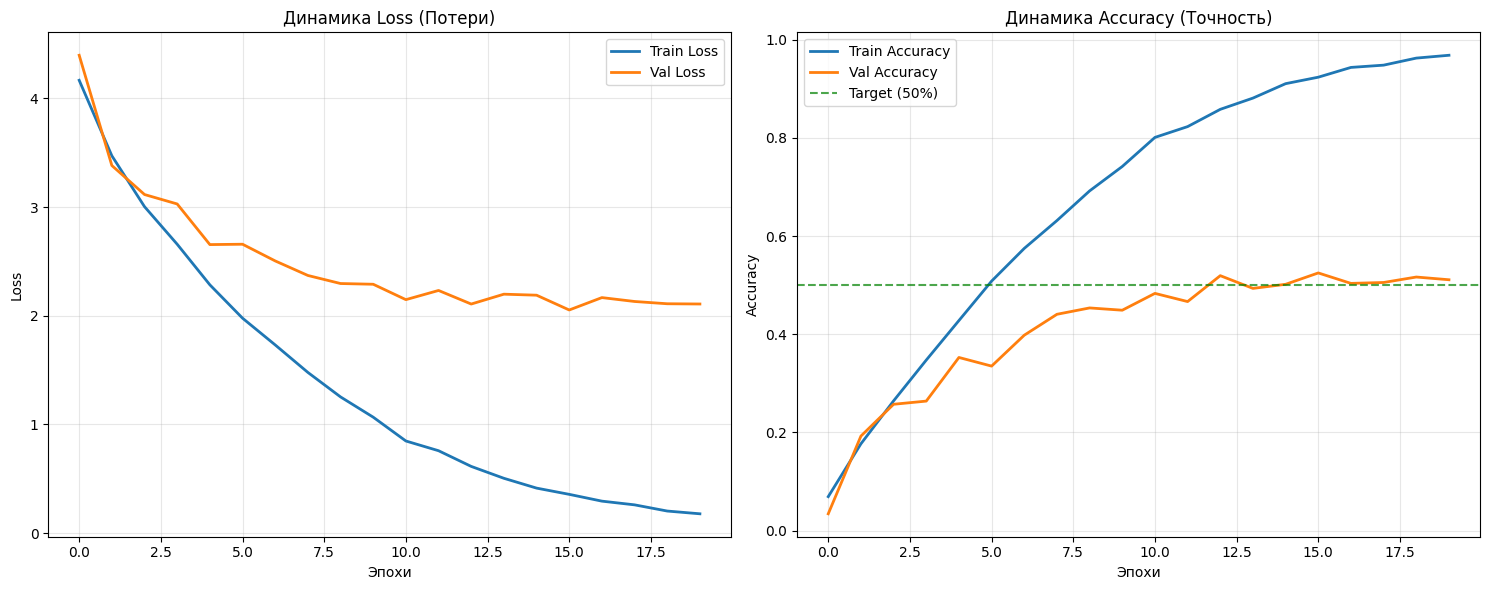

Примеры предсказаний на тестовых данных:


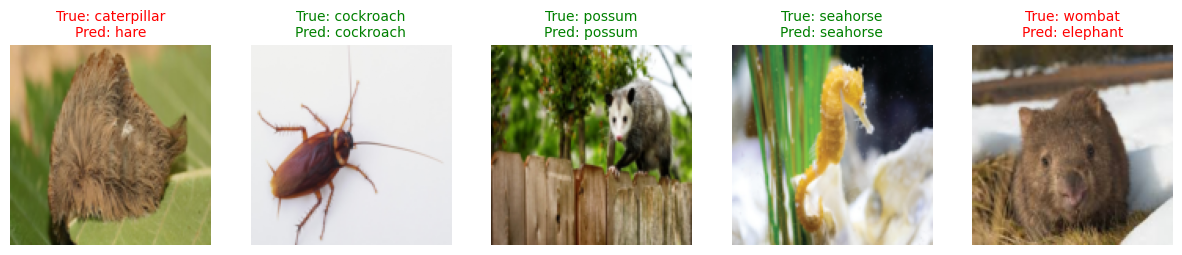

Экспорт модели в model.pth
Успешно! Модель сохранена.
Проверка целостности пройдена. Размер выходного тензора: torch.Size([1, 90])


True

In [ ]:
print("Построение графиков обучения")

plt.figure(figsize=(15, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss', color='#1f77b4', linewidth=2)
plt.plot(history['val_loss'], label='Val Loss', color='#ff7f0e', linewidth=2)
plt.title('Динамика Loss (Потери)')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy', color='#1f77b4', linewidth=2)
plt.plot(history['val_acc'], label='Val Accuracy', color='#ff7f0e', linewidth=2)
plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Target (50%)') # Целевая отметка
plt.title('Динамика Accuracy (Точность)')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Визуальная проверка
def imshow(tensor, ax, title=None, color='black'):
    """Вспомогательная функция для отрисовки тензора"""
    img = tensor.cpu().clone()
    img = img * 0.5 + 0.5
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        ax.set_title(title, color=color, fontsize=10)
    ax.axis('off')

dataiter = iter(val_loader)
images, labels = next(dataiter)

# Первые 5 примеров
num_samples = 5
images = images[:num_samples]
labels = labels[:num_samples]

# Прогоняем через модель
model.eval()
with torch.no_grad():
    outputs = model(images.to(Config.DEVICE))
    _, predicted = torch.max(outputs, 1)

print(f"Примеры предсказаний на тестовых данных:")
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    true_idx = labels[i].item()
    pred_idx = predicted[i].item()
    
    true_label = idx_to_class[true_idx]
    pred_label = idx_to_class[pred_idx]
    is_correct = true_idx == pred_idx
    color = 'green' if is_correct else 'red'
    title_text = f"True: {true_label}\nPred: {pred_label}"
    
    imshow(images[i], axes[i], title=title_text, color=color)

plt.show()


def save_model_for_production(model, path="model.pth"):
    """
    Сохраняет модель с использованием TorchScript (JIT).
    Это позволяет запускать модель в C++ или на сервере без Python-кода модели.
    """
    print(f"Экспорт модели в {path}")
    model.eval()
    model.cpu()
    example_input = torch.randn(1, 3, Config.IMG_SIZE, Config.IMG_SIZE)   
    try:
        traced_model = torch.jit.trace(model, (example_input,))
        torch.jit.save(traced_model, path)
        print(f"Успешно! Модель сохранена.")
        loaded_model = torch.jit.load(path)
        with torch.no_grad():
            output = loaded_model(example_input)
        print(f"Проверка целостности пройдена. Размер выходного тензора: {output.shape}")
        return True   
    except Exception as e:
        print(f"Ошибка при экспорте модели: {e}")
        return False
save_model_for_production(model)